In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import gc
import glob
import imageio.v2
import os
from IPython import display
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

In [2]:
path = '/glade/work/noteng/masters-research/data/lwc_precip_rate/'
data = 'lwe_precip_rate-march13-march14.nc'
ds = xr.open_dataset(path+data, engine='netcdf4')
# selecting the radar precipitation variable
ds1 = ds.sel(time=slice('2020-03-13T04:00:00.000000000', '2020-03-14T00:00:00.000000000'))
lwe_precip_rate = ds1['lwe_precipitation_rate']
lwe_precip_rate

<xarray.DataArray 'lwe_precipitation_rate' (time: 21, Yc: 1869, Xc: 1554)>
[60992946 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T04:00:00 ... 2020-03-14
  * Xc       (Xc) float32 -2.95e+05 -2.94e+05 -2.93e+05 ... 1.257e+06 1.258e+06
  * Yc       (Yc) float32 8.124e+06 8.123e+06 8.122e+06 ... 6.257e+06 6.256e+06
    lon      (Yc, Xc) float32 ...
    lat      (Yc, Xc) float32 ...
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      Radar Precipitation Rate
    units:          mm/h
    grid_mapping:   projection_utm

In [3]:
# # Resample data and sum the precipitation data along the time dimension
sum_lwe_precip_rate = lwe_precip_rate.resample(time='1H').sum(dim=['time']) # units in mm/hr
sum_all_lwe_precip_rate = lwe_precip_rate.sum(dim='time') # units in mm
sum_all_lwe_precip_rate

<xarray.DataArray 'lwe_precipitation_rate' (Yc: 1869, Xc: 1554)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * Xc       (Xc) float32 -2.95e+05 -2.94e+05 -2.93e+05 ... 1.257e+06 1.258e+06
  * Yc       (Yc) float32 8.124e+06 8.123e+06 8.122e+06 ... 6.257e+06 6.256e+06
    lon      (Yc, Xc) float32 ...
    lat      (Yc, Xc) float32 ...

In [4]:
# len(sum_lwe_precip_rate)

In [5]:
# np.max(sum_lwe_precip_rate.data), np.min(sum_lwe_precip_rate.data)

In [6]:
np.max(sum_all_lwe_precip_rate.data), np.min(sum_all_lwe_precip_rate.data)

(283.09042, 0.0)

In [7]:
#90th percentile
np.percentile(sum_all_lwe_precip_rate.data, 90)

1.8990407586097717

In [8]:
#50th percentile
np.percentile(sum_all_lwe_precip_rate.data, 50)

0.0

In [9]:
#75th percentile
np.percentile(sum_all_lwe_precip_rate.data, 25)

0.0

In [10]:
sum_all_lwe_precip_rate

<xarray.DataArray 'lwe_precipitation_rate' (Yc: 1869, Xc: 1554)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * Xc       (Xc) float32 -2.95e+05 -2.94e+05 -2.93e+05 ... 1.257e+06 1.258e+06
  * Yc       (Yc) float32 8.124e+06 8.123e+06 8.122e+06 ... 6.257e+06 6.256e+06
    lon      (Yc, Xc) float32 ...
    lat      (Yc, Xc) float32 ...

In [11]:
sum_all_lwe_precip_rate['lat'].values

array([[71.80876 , 71.812126, 71.8155  , ..., 71.93762 , 71.93438 ,
        71.931145],
       [71.80052 , 71.803894, 71.80726 , ..., 71.92932 , 71.92609 ,
        71.92285 ],
       [71.79229 , 71.79566 , 71.79903 , ..., 71.92103 , 71.91779 ,
        71.91456 ],
       ...,
       [55.806084, 55.80772 , 55.809353, ..., 55.868443, 55.86688 ,
        55.865314],
       [55.79732 , 55.798954, 55.800587, ..., 55.859657, 55.858097,
        55.856533],
       [55.788555, 55.79019 , 55.791824, ..., 55.850872, 55.84931 ,
        55.847748]], dtype=float32)

In [12]:
# ds = sum_all_lwe_precip_rate.copy()
# res = ds.where((ds['lon'] > 10) & (ds['lon'] < 15.7) & (ds['lat'] > 68) & (ds['lat'] < 70), drop=True)
# np.max(res)

sum_all_lwe_precip_rate1 = sum_all_lwe_precip_rate.copy()
sum_all_lwe_precip_rate1 = sum_all_lwe_precip_rate1.where((sum_all_lwe_precip_rate1['lon'] >= 10) & (sum_all_lwe_precip_rate1['lon'] <= 16.2) & (sum_all_lwe_precip_rate1['lat'] >= 68) & (sum_all_lwe_precip_rate1['lat'] <= 70), drop=True)
np.max(sum_all_lwe_precip_rate1)

<xarray.DataArray 'lwe_precipitation_rate' ()>
array(10.26781, dtype=float32)

In [13]:
np.nanpercentile(sum_all_lwe_precip_rate1.data, 90)

4.969754314422607

In [14]:
#90th percentile
np.nanpercentile(sum_all_lwe_precip_rate1.data, 90)

4.969754314422607

In [15]:
# sum_all_lwe_precip_rate.to_netcdf('./saved-files/sum_all_lwe_precip_rate-simulated.nc')

In [16]:
# xr.open_dataarray('./saved-files/sum_all_lwe_precip_rate-simulated.nc')

In [17]:
# print(f'time   ---------------------   precipitation rate')
# for i in range(0, 21):
#     print(f'{sum_lwe_precip_rate.time.values[i]} -- {np.max(sum_lwe_precip_rate[i].data)}')

In [15]:
# for all time steps
np.nanmax(sum_all_lwe_precip_rate1.data)

10.26781

In [16]:
np.nanpercentile(sum_all_lwe_precip_rate1.data, 90)

4.969754314422607

In [20]:
# np.percentile(sum_lwe_precip_rate[5].data, 90)

In [21]:
# for i in range(0, len(sum_lwe_precip_rate)):
#     latA = 69.141281  # latitude of COMBLE site
#     lonA = 15.684166-1  # longitude of COMBLE site -1
#     xm, ym = 6, 2.75  # extent from center point in lon and lat


#     fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={
#                                'projection': ccrs.Orthographic(lonA, latA)})
#     # set extent
#     extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
#     ax.set_extent(extent)  # set extent of map


#     # plotting coastlines at a very high resolution: 10m
#     ax.coastlines(resolution='10m', zorder=7)
#     # add borders
#     ax.add_feature(cfeature.BORDERS, zorder=7)
#     # add land
#     ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=1, zorder=6)
#     # add grid lines
#     gl = ax.gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=True
#     gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
#     gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 
#     # add terrain
#     ax.add_feature(cfeature.GSHHSFeature(scale='high'))
#     # Radar locations
#     ax.plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
#             transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
#     ax.plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
#             transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
#     ax.plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
#             transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE
    

#     # # Create the 'jet' colormap
#     # cmap = plt.get_cmap('GnBu')
#     # # Modify the colormap
#     # colors = cmap(np.arange(cmap.N))
#     # colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
#     # new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)


#     # # OVERLAY RADAR PRECIPITATION RATE DATA OVER PROJECTION
#     # # change time to moth, day, year, hours and minutes
#     dt = sum_lwe_precip_rate['time'].dt.strftime('%m-%d-%Y %H:%M').values  # array
#     # raw=ndimage.gaussian_filter(sum_lwe_precip_rate[9], sigma=5)
    
#     #######################
#     cmap='Blues'
#     norm = Normalize(vmin=0, vmax=1.5)
#     # vmin=0; vmax=1.6
#     cs = ax.pcolormesh(sum_lwe_precip_rate['lon'], 
#                        sum_lwe_precip_rate['lat'], 
#                        sum_lwe_precip_rate[i].values,
#                        transform=ccrs.PlateCarree(),
#                        cmap=cmap,
#                        norm=norm
#                       )

#     # Create the box around the text
#     bbox = dict(facecolor='white', edgecolor='black', boxstyle='round')
#     path_effects = [PathEffects.withStroke(linewidth=1.5, foreground='w')]

#     # Add the text and the box to the plot
#     # latA1 = 71.69; lonA1 = 7.3 
#     latA1 = 71.53; lonA1 = 7.3 
#     ax.text(lonA1, latA1, f'90th percentile={np.percentile(sum_lwe_precip_rate[5].data, 90):.2f} mm\nmean={np.mean(sum_lwe_precip_rate[i].data):.2f} mm', 
#             transform=ccrs.PlateCarree(), color='black', fontsize=10,  bbox=bbox, path_effects=path_effects)



#     ax.set_title(
#             f"LWE Precipitation Rate: {dt[i]} UTC", fontweight='bold', fontsize=16, pad=11)

#     # # Add a colorbar axis at the right of the graph
#     cbar_ax = fig.add_axes([0.85, 0.12, 0.047, 0.75])  # lbwh

#     cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', extend='max', )
#     cbar.set_label("Radar Precipitation Rate [mm/h]", fontsize=15)
    
#     dirr = sorted(os.listdir('./images///'))
#     if f'{dt[i]}.png' in dirr:
#         # print(f'{dt[i]}.png already exist')
#         pass
#         plt.close()
#     else:
#         fig.savefig(f'./images///{dt[i]}.png', bbox_inches='tight',dpi=400)
#         plt.close()
# print('\U0001f600\U0001f600\U0001f600\U0001f600EXECUTION DONE!!!\U0001f600\U0001f600\U0001f600\U0001f600')

In [22]:
# %%time
# # Build GIF
# imgs = sorted(glob.glob("./images/*.png"))
# with imageio.get_writer('precip-rate.gif', mode='I', duration=0.3) as writer: 
#     for filename in imgs:
#         image = imageio.v2.imread(filename)
#         writer.append_data(image)

In [23]:
# %%time
# #Display image
# display.Image('precip-rate.gif', width=800)

In [24]:
## 90th percentile.

# all precipitation times

In [21]:
sum_all_lwe_precip_rate

<xarray.DataArray 'lwe_precipitation_rate' (Yc: 231, Xc: 259)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.5115724 , 0.49329403,
        0.4900764 ],
       [       nan,        nan,        nan, ..., 0.5587282 , 0.53214777,
        0.49289614],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * Xc       (Xc) float32 2.92e+05 2.93e+05 2.94e+05 ... 5.49e+05 5.5e+05
  * Yc       (Yc) float32 7.773e+06 7.772e+06 7.771e+06 ... 7.544e+06 7.543e+06
    lon      (Yc, Xc) float32 9.55 9.576 9.602 9.628 ... 16.12 16.15 16.17 16.2
    lat      (Yc, Xc) float32 69.98 69.98 69.98 69.98 ... 68.0 68.0 68.0 68.0

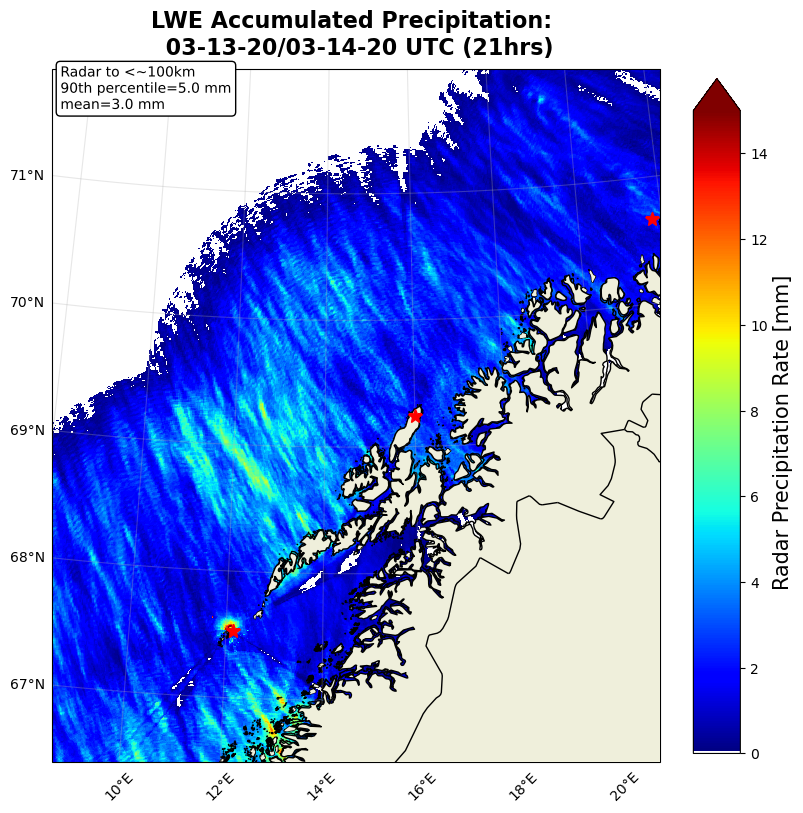

In [18]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat


fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={
                           'projection': ccrs.Orthographic(lonA, latA)})
# set extent
extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
ax.set_extent(extent)  # set extent of map


# plotting coastlines at a very high resolution: 10m
ax.coastlines(resolution='10m', zorder=7)
# add borders
ax.add_feature(cfeature.BORDERS, zorder=7)
# add land
ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=1, zorder=6)
# add grid lines
gl = ax.gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 
# add terrain
ax.add_feature(cfeature.GSHHSFeature(scale='high'))
# Radar locations
ax.plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
ax.plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
ax.plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE


# # Create the 'jet' colormap
cmap = plt.get_cmap('jet')
# # Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)



# # OVERLAY RADAR PRECIPITATION RATE DATA OVER PROJECTION

# # change time to moth, day, year, hours and minutes
dt = sum_lwe_precip_rate['time'].dt.strftime('%m-%d-%Y %H:%M').values  # array
norm = Normalize(vmin=0, vmax=15)
cmap = 'Blues'
cs = ax.pcolormesh(sum_all_lwe_precip_rate['lon'], 
                   sum_all_lwe_precip_rate['lat'], 
                   sum_all_lwe_precip_rate,
                   transform=ccrs.PlateCarree(),
                   cmap=new_cmap,
                   norm=norm
                  )

# Create the box around the text
bbox = dict(facecolor='white', edgecolor='black', boxstyle='round')
path_effects = [PathEffects.withStroke(linewidth=1.5, foreground='w')]

# Add the text and the box to the plot
# latA1 = 71.69; lonA1 = 7.3 
latA1 = 71.53; lonA1 = 7.3 
ax.text(lonA1, latA1, f'Radar to <~100km\n90th percentile={np.nanpercentile(sum_all_lwe_precip_rate1.data, 90):.1f} mm\nmean={np.nanmean(sum_all_lwe_precip_rate1.data):.1f} mm', 
        transform=ccrs.PlateCarree(), color='black', fontsize=10,  bbox=bbox, path_effects=path_effects)


ax.set_title(
        f"LWE Accumulated Precipitation: \n 03-13-20/03-14-20 UTC (21hrs)", fontweight='bold', fontsize=16, pad=11)

# # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.85, 0.12, 0.047, 0.75])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', extend='max')
cbar.set_label("Radar Precipitation Rate [mm]", fontsize=15)

    

# fig.savefig('accumulated-precip-rate-13th-14th-March.png', bbox_inches='tight',dpi=500)

In [43]:
import xarray as xr

# Assuming 'data' is an xarray dataset or data array with dimensions 'longitude' and 'latitude'

# Define the longitude and latitude ranges
lon_min, lon_max = -4.8526306, 29.769287
lat_min, lat_max = 67.602486, 76.93586

# Mask the data based on longitude and latitude ranges
masked_data = sum_all_lwe_precip_rate.where((sum_all_lwe_precip_rate.lon > lon_min) & (sum_all_lwe_precip_rate.lon < lon_max) &
                         (sum_all_lwe_precip_rate.lat > lat_min) & (sum_all_lwe_precip_rate.lat < lat_max), drop=True)
masked_data

<xarray.DataArray 'lwe_precipitation_rate' (Yc: 626, Xc: 1418)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * Xc       (Xc) float32 -2.95e+05 -2.94e+05 -2.93e+05 ... 1.121e+06 1.122e+06
  * Yc       (Yc) float32 8.124e+06 8.123e+06 8.122e+06 ... 7.5e+06 7.499e+06
    lon      (Yc, Xc) float32 -8.336 -8.31 -8.284 -8.257 ... 29.3 29.32 29.35
    lat      (Yc, Xc) float32 71.81 71.81 71.82 71.82 ... 66.96 66.96 66.96

In [44]:
masked_data.data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [46]:
np.nanpercentile(masked_data.data, 90), np.nanmean(masked_data.data)

(2.332806348800659, 0.5948056)

In [93]:
# sum_all_lwe_precip_rate['lat'][500]
# sum_all_lwe_precip_rate['lat'][0]

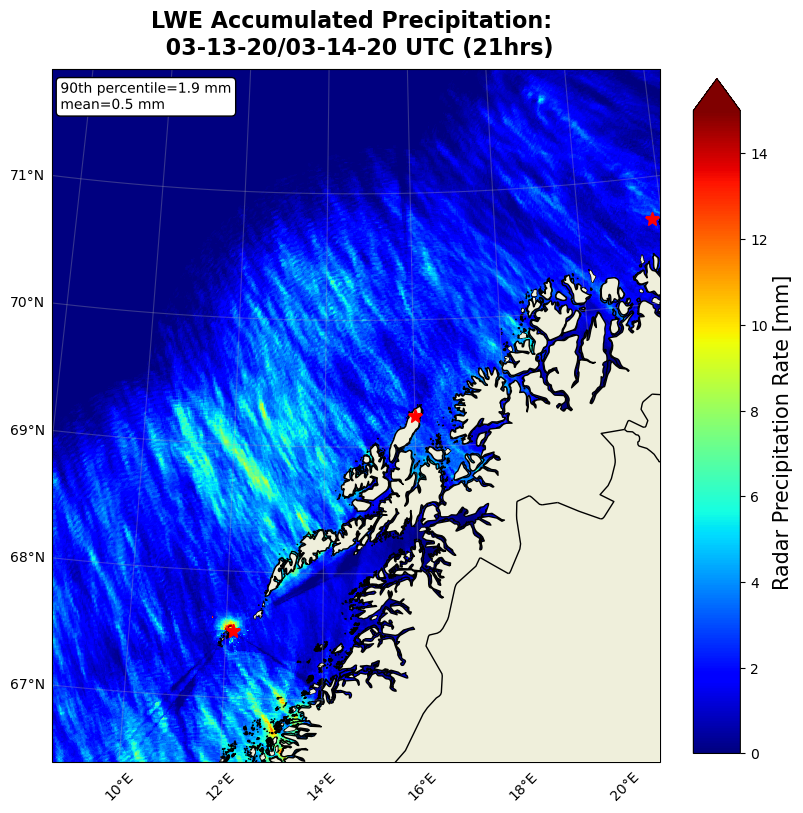

In [12]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat


fig, ax = plt.subplots(figsize=(10, 9), subplot_kw={
                           'projection': ccrs.Orthographic(lonA, latA)})
# set extent
extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
ax.set_extent(extent)  # set extent of map


# plotting coastlines at a very high resolution: 10m
ax.coastlines(resolution='10m', zorder=7)
# add borders
ax.add_feature(cfeature.BORDERS, zorder=7)
# add land
ax.add_feature(cfeature.LAND, linewidth=1.5, alpha=1, zorder=6)
# add grid lines
gl = ax.gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 
# add terrain
ax.add_feature(cfeature.GSHHSFeature(scale='high'))
# Radar locations
ax.plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
ax.plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
ax.plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
        transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE


# # Create the 'jet' colormap
cmap = plt.get_cmap('jet')
# # Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)



# # OVERLAY RADAR PRECIPITATION RATE DATA OVER PROJECTION

# # change time to moth, day, year, hours and minutes
dt = sum_lwe_precip_rate['time'].dt.strftime('%m-%d-%Y %H:%M').values  # array
norm = Normalize(vmin=0, vmax=15)
cmap = 'jet'
cs = ax.pcolormesh(sum_all_lwe_precip_rate['lon'], 
                   sum_all_lwe_precip_rate['lat'], 
                   sum_all_lwe_precip_rate,
                   transform=ccrs.PlateCarree(),
                   cmap=cmap,
                   norm=norm
                  )

# Create the box around the text
bbox = dict(facecolor='white', edgecolor='black', boxstyle='round')
path_effects = [PathEffects.withStroke(linewidth=1.5, foreground='w')]

# Add the text and the box to the plot
# latA1 = 71.69; lonA1 = 7.3 
latA1 = 71.53; lonA1 = 7.3 
ax.text(lonA1, latA1, f'90th percentile={np.percentile(sum_all_lwe_precip_rate.data, 90):.1f} mm\nmean={np.mean(sum_all_lwe_precip_rate.data):.1f} mm', 
        transform=ccrs.PlateCarree(), color='black', fontsize=10,  bbox=bbox, path_effects=path_effects)


ax.set_title(
        f"LWE Accumulated Precipitation: \n 03-13-20/03-14-20 UTC (21hrs)", fontweight='bold', fontsize=16, pad=11)

# # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.85, 0.12, 0.047, 0.75])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical', extend='max')
cbar.set_label("Radar Precipitation Rate [mm]", fontsize=15)

    

fig.savefig('final-accumulated-precip-rate-13th-14th-March.png', bbox_inches='tight',dpi=500)

In [2]:
import rasterio

ModuleNotFoundError: No module named 'rasterio'